# Análise de Desempenho e Visualização dos Dados

Esse código em Python realiza as seguintes tarefas:

1. **Análise de Dados**: Lê os dados de tempo de execução para algoritmos de ordenação sequenciais e concorrentes a partir de um arquivo CSV.
2. **Cálculos de Aceleração e Eficiência**: Calcula as métricas de aceleração e eficiência para algoritmos concorrentes em relação aos seus equivalentes sequenciais.
3. **Visualização**: Plota gráficos de aceleração e eficiência em função do número de threads para os algoritmos QuickSort e MinMaxSort.
4. **Exportação de Resultados**: Salva os resultados calculados em um arquivo Excel.

---

## Funções Principais

### **1. Cálculo de Aceleração e Eficiência**
A função `calcular_aceleracao_eficiencia` calcula:
- **Aceleração**: Razão entre o tempo de execução sequencial e o tempo de execução concorrente.
- **Eficiência**: Aceleração dividida pelo número de threads.

**Entradas:**
- Caminho para um arquivo CSV contendo dados de tempo de execução.

**Saídas:**
- Um DataFrame do pandas contendo:
  - Nome do programa (Versão concorrente).
  - Tamanho da entrada (`Comprimento`).
  - Número de threads (`Threads`).
  - Aceleração e eficiência calculadas.

### **2. Visualização**
A função `plotar_graficos` gera gráficos de linhas:
- **Aceleração**: Quanto mais rápido o programa concorrente é em comparação com a versão sequencial.
- **Eficiência**: Quão eficazmente as threads são utilizadas.

**Entradas:**
- DataFrame processado de `calcular_aceleracao_eficiencia`.
- Nome do programa (`ConcQuicksort` ou `ConcMinMaxSort`).
- Eixos do Matplotlib para plotagem.

**Saídas:**
- Dois gráficos por programa:
  - Aceleração vs. Threads
  - Eficiência vs. Threads

---

## Uso

### **Passo 1: Preparar os Dados de Entrada**
Certifique-se de que seu arquivo CSV (`InputDesc.csv` ou `InputRandom.csv`) esteja estruturado com as colunas:
- `Programa`: Nome do programa (`SeqMinMaxSort`, `ConcMinMaxSort`, etc.).
- `Tempo`: Tempo de execução.
- `Comprimento`: Tamanho da entrada do array.
- `Threads`: Número de threads usadas (para programas concorrentes).

### **Passo 2: Calcular Métricas**
Execute o script para calcular a aceleração e a eficiência:
```python
resultados_df = calcular_aceleracao_eficiencia("InputDesc.csv")
```

### **Passo 3: Salvar Resultados**
Salve as métricas calculadas em um arquivo Excel:
```python
resultados_df.to_excel("InputDescResults.xlsx", index=False)
```

### **Passo 4: Plotar Gráficos**
Visualize os resultados usando o Matplotlib:
```python
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plotar_graficos(resultados_df, "ConcQuicksort", axs[0, 0], axs[0, 1])
plotar_graficos(resultados_df, "ConcMinMaxSort", axs[1, 0], axs[1, 1])
plt.tight_layout()
plt.show()
```

---

## Saídas

### **1. Tabela de Métricas**
- Um DataFrame contendo:
  - `Programa Concorrente`
  - `Comprimento`
  - `Threads`
  - `Aceleração`
  - `Eficiência`

### **2. Gráficos**
- **Aceleração vs. Threads**: Mostra o ganho de desempenho alcançado pelos programas concorrentes em relação aos seus equivalentes sequenciais.
- **Eficiência vs. Threads**: Indica quão eficientemente as threads estão sendo utilizadas à medida que mais threads são adicionadas.

---

## Exemplos de Gráficos

1. **Input Ordem Decrescente**  
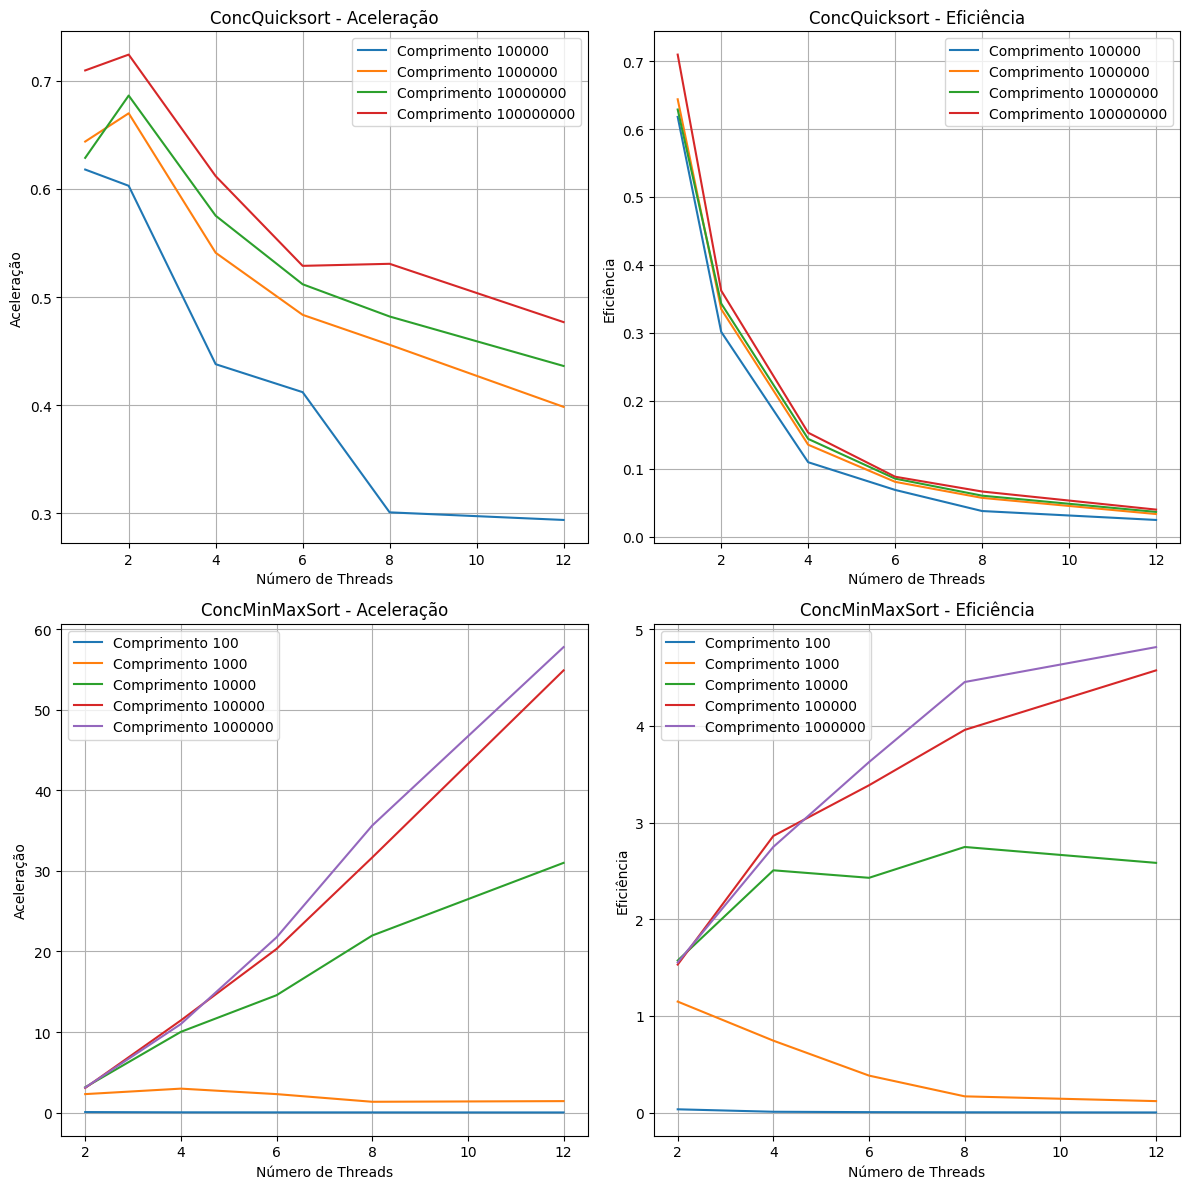

2. **Input Ordem Aleatória**  
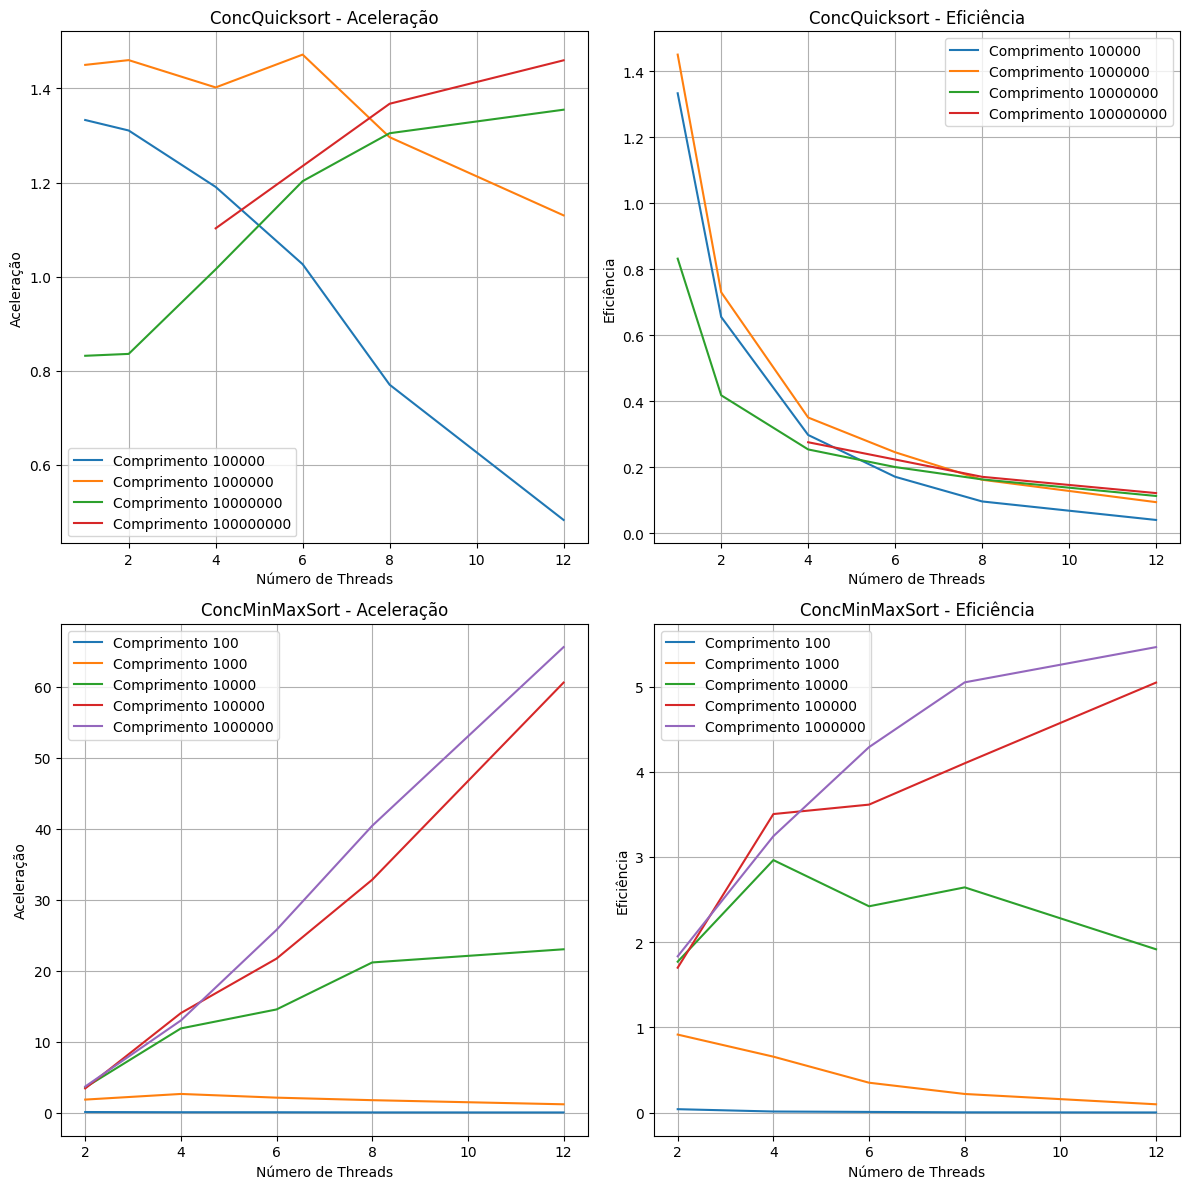

---

## Dependências

- **Bibliotecas Python**: `pandas`, `matplotlib`
- **Arquivo de Dados**: Certifique-se de que o arquivo CSV tenha a estrutura esperada e esteja acessível.


# Código:

## Bibliotecas:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Funções:

In [12]:
# Função para calcular a aceleração e eficiência de programas sequenciais e concorrentes.
# A aceleração é a razão entre o tempo de execução do programa sequencial e o tempo do programa concorrente.
# A eficiência é a aceleração dividida pelo número de threads utilizadas no programa concorrente.
# O código lê um arquivo CSV com os tempos de execução de diferentes programas, agrupa os dados por parâmetros relevantes,
# e calcula a aceleração e eficiência para cada par de programas sequenciais e concorrentes.

def calcular_aceleracao_eficiencia(caminho_arquivo):
    # Ler o arquivo CSV em um DataFrame do pandas
    df = pd.read_csv(caminho_arquivo)
    
    # Lista para armazenar os resultados de aceleração e eficiência
    resultados = []
    
    # Dicionário que mapeia os programas sequenciais para seus equivalentes concorrentes
    pares_programas = {
        "SeqMinMaxSort": "ConcMinMaxSort",  # Par: programa sequencial e seu equivalente concorrente
        "SeqQuicksort": "ConcQuicksort"     # Outro par: programa sequencial e seu equivalente concorrente
    }
    
    # Agrupar os dados para programas sequenciais, agrupando por 'Comprimento' e 'Programa'
    # 'Tempo' é a média dos tempos de execução para cada grupo
    tempo_seq = df[df['Programa'].str.startswith("Seq")].groupby(['Comprimento', 'Programa'])['Tempo'].mean().reset_index()

    # Agrupar os dados para programas concorrentes, agrupando por 'Threads', 'Comprimento' e 'Programa'
    # 'Tempo' também é a média dos tempos de execução para cada grupo
    tempo_conc = df[df['Programa'].str.startswith("Conc")].groupby(['Threads', 'Comprimento', 'Programa'])['Tempo'].mean().reset_index()

    # Iterar sobre os pares de programas sequenciais e concorrentes
    for programa_seq, programa_conc in pares_programas.items():
        # Obter os dados do programa sequencial correspondente
        tempo_seq_data = tempo_seq[tempo_seq['Programa'] == programa_seq]
        
        # Iterar sobre os diferentes valores de 'Comprimento' no programa sequencial
        for comprimento in tempo_seq_data['Comprimento'].unique():
            tempo_seq_val = tempo_seq_data[tempo_seq_data['Comprimento'] == comprimento]['Tempo'].values[0]
            
            # Obter os dados do programa concorrente com o mesmo 'Comprimento'
            tempo_conc_data = tempo_conc[(tempo_conc['Programa'] == programa_conc) & (tempo_conc['Comprimento'] == comprimento)]
            
            # Calcular a aceleração e a eficiência para cada valor de 'Threads' no programa concorrente
            for _, row in tempo_conc_data.iterrows():
                threads = row['Threads']
                tempo_conc_val = row['Tempo']
                
                # Calcular aceleração (tempo sequencial / tempo concorrente)
                aceleracao = tempo_seq_val / tempo_conc_val
                # Calcular eficiência (aceleração / número de threads)
                eficiencia = aceleracao / threads
                
                # Adicionar os resultados (par de programas, comprimento, threads, aceleração e eficiência) à lista
                resultados.append({
                    'Programa Concorrente': programa_conc,
                    'Comprimento': comprimento,
                    'Threads': threads,
                    'Aceleração': aceleracao,
                    'Eficiência': eficiencia
                })

    # Retornar os resultados em um DataFrame do pandas
    return pd.DataFrame(resultados)


In [24]:
def plotar_graficos(dados, programa, ax1, ax2):
    """
    Função para plotar os gráficos de aceleração e eficiência para um programa dado.
    A aceleração é o quanto o programa concorrente se aproxima da performance do programa sequencial.
    A eficiência é a aceleração dividida pelo número de threads usadas.

    Parâmetros:
    - dados: DataFrame contendo os dados a serem usados para os gráficos (incluindo 'Threads', 'Aceleração', 'Eficiência').
    - programa: O nome do programa para o qual os gráficos serão gerados ('ConcQuicksort' ou 'ConcMinMaxSort').
    - ax1: O eixo (objeto matplotlib) para o gráfico de aceleração.
    - ax2: O eixo (objeto matplotlib) para o gráfico de eficiência.
    """
    
    # Filtrar os dados para o programa dado (Concorrente)
    dados_programa = dados[dados['Programa Concorrente'] == programa]
    
    # Garantir que estamos lidando com comprimentos adequados para ambos os programas
    # Filtrar os dados para comprimentos entre 100.000 e 10.000.000
    # Filtrar os dados para comprimentos entre 10.000 e 10.000.000
    if programa == "ConcQuicksort":
        dados_programa = dados_programa[dados_programa['Comprimento'].between(100000, 100000000)]
    else:  # Para o programa 'ConcMinMaxSort'
        dados_programa = dados_programa[dados_programa['Comprimento'].between(100, 10000000)]

    # Plotar o gráfico de Aceleração
    for comprimento in dados_programa['Comprimento'].unique():
        dados_comprimento = dados_programa[dados_programa['Comprimento'] == comprimento]
        ax1.plot(dados_comprimento['Threads'], dados_comprimento['Aceleração'], label=f"Comprimento {comprimento}")
    
    # Configurar o gráfico de Aceleração
    ax1.set_xlabel('Número de Threads')  # Rótulo do eixo X
    ax1.set_ylabel('Aceleração')         # Rótulo do eixo Y
    ax1.set_title(f'{programa} - Aceleração')  # Título do gráfico
    ax1.grid(True)  # Habilitar a grade no gráfico
    ax1.legend()    # Adicionar a legenda, que indica os diferentes comprimentos

    # Plotar o gráfico de Eficiência
    for comprimento in dados_programa['Comprimento'].unique():
        dados_comprimento = dados_programa[dados_programa['Comprimento'] == comprimento]
        ax2.plot(dados_comprimento['Threads'], dados_comprimento['Eficiência'], label=f"Comprimento {comprimento}")
    
    # Configurar o gráfico de Eficiência
    ax2.set_xlabel('Número de Threads')  # Rótulo do eixo X
    ax2.set_ylabel('Eficiência')         # Rótulo do eixo Y
    ax2.set_title(f'{programa} - Eficiência')  # Título do gráfico
    ax2.grid(True)  # Habilitar a grade no gráfico
    ax2.legend()    # Adicionar a legenda, que indica os diferentes comprimentos


## Plot

### Input Ordem Decrescente

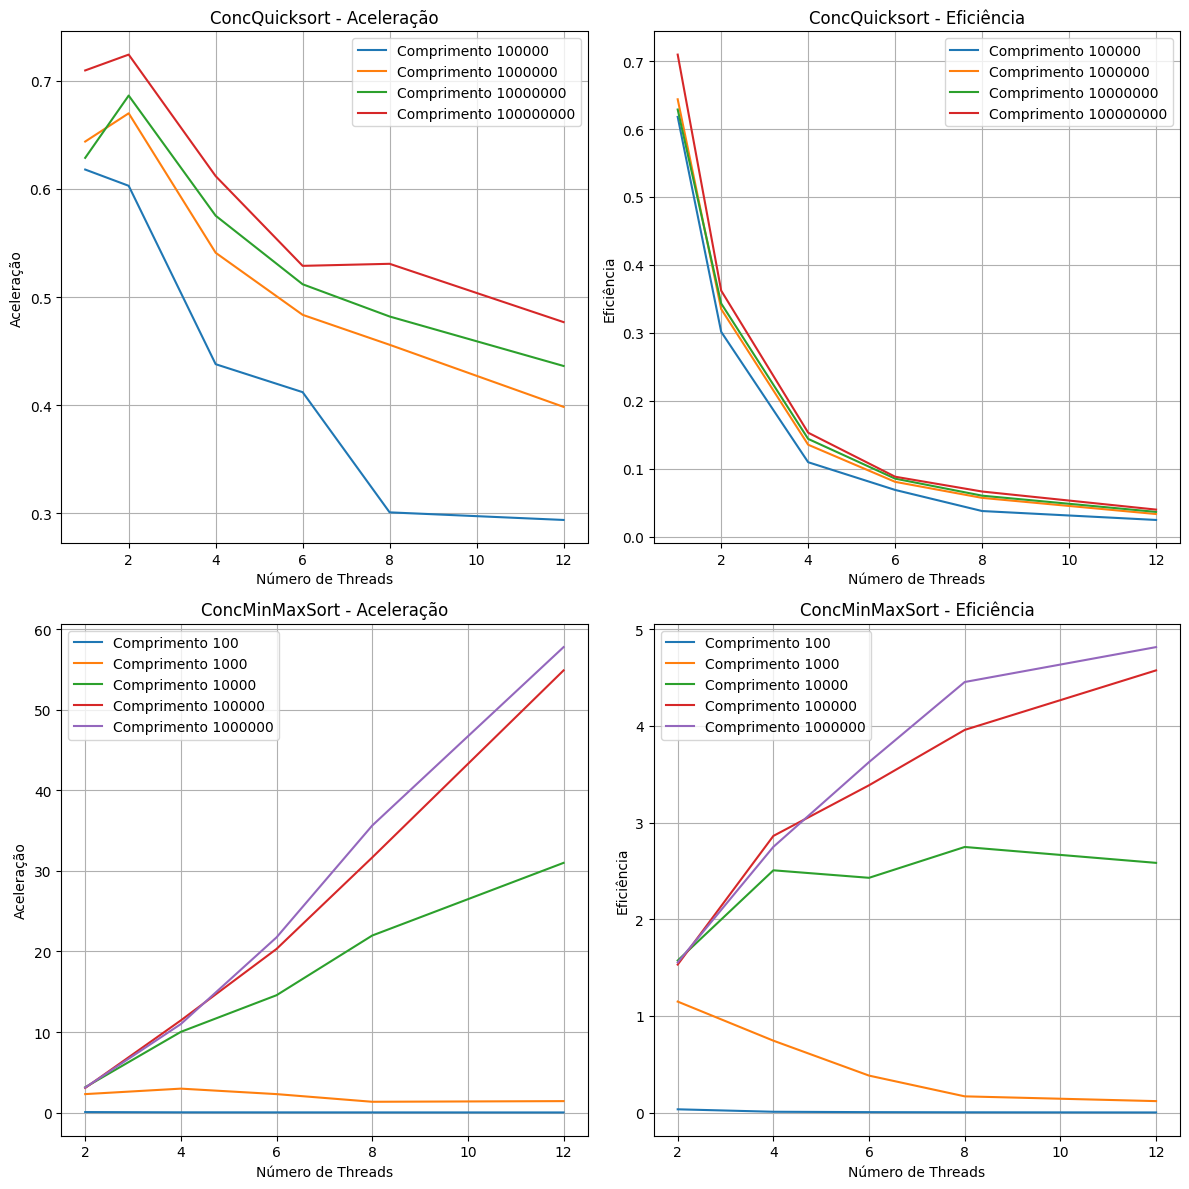

In [25]:
# Caminho do arquivo CSV
caminho_arquivo = "InputDesc.csv"

# Chamar a função para calcular aceleração e eficiência
resultados_df = calcular_aceleracao_eficiencia(caminho_arquivo)

# Save the results to Excel
resultados_df.to_excel("InputDescExcel.xlsx", index=False)

# Create the figure for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot graphs for Quicksort and MinMaxSort
plotar_graficos(resultados_df, "ConcQuicksort", axs[0, 0], axs[0, 1])
plotar_graficos(resultados_df, "ConcMinMaxSort", axs[1, 0], axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### Input Ordem Aleatória

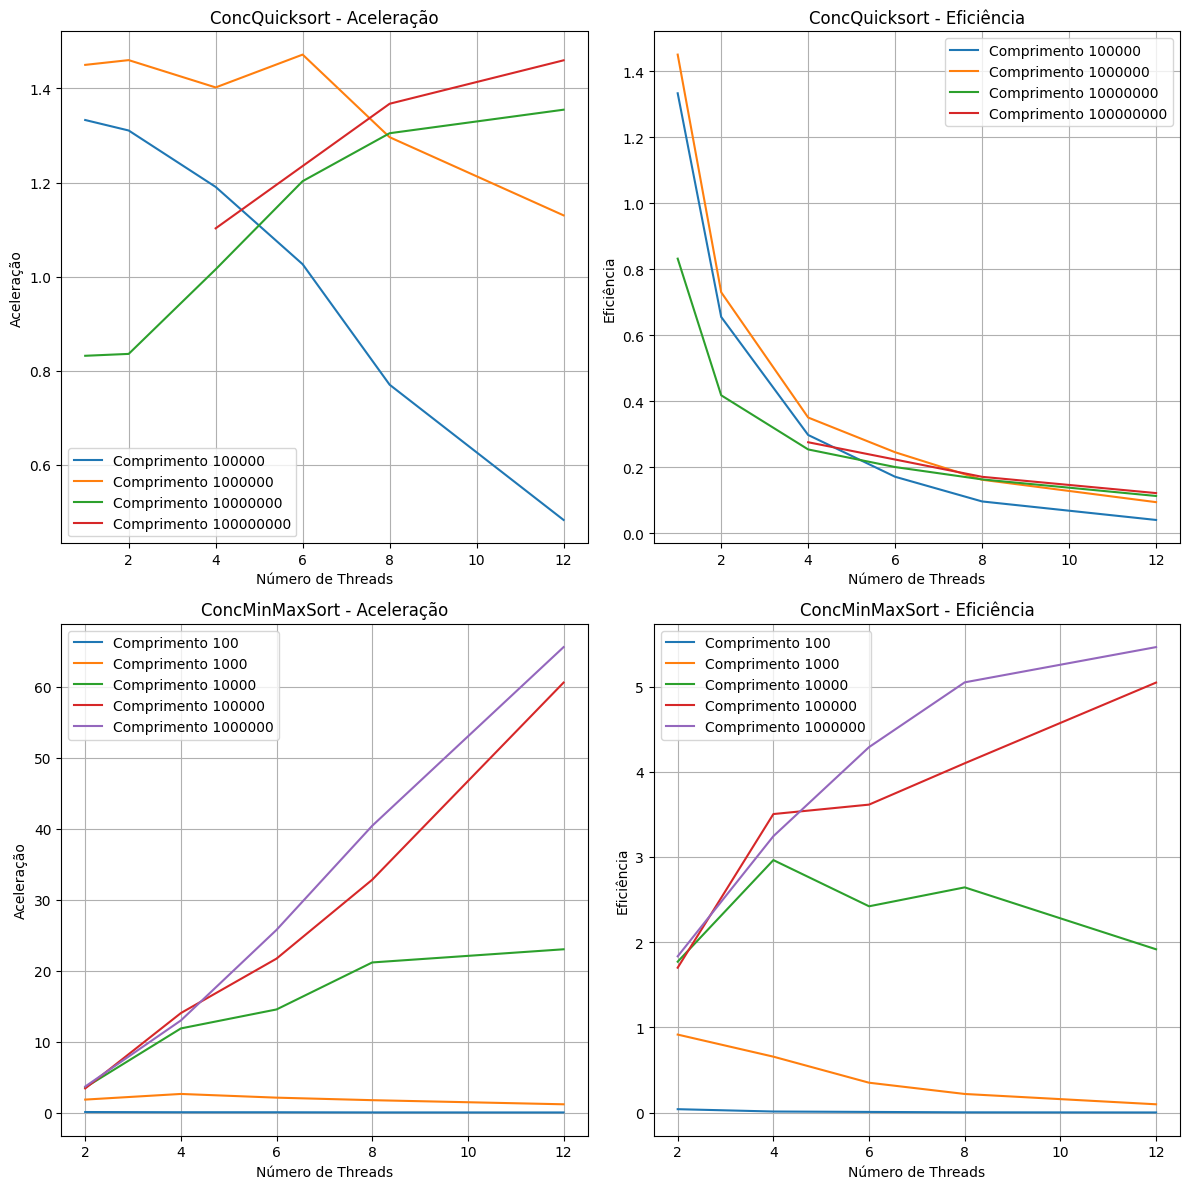

In [26]:
# Caminho do arquivo CSV
caminho_arquivo = "InputRandom.csv"

# Chamar a função para calcular aceleração e eficiência
resultados_df = calcular_aceleracao_eficiencia(caminho_arquivo)

# Save the results to Excel
resultados_df.to_excel("InputRandomExcel.xlsx", index=False)

# Create the figure for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot graphs for Quicksort and MinMaxSort
plotar_graficos(resultados_df, "ConcQuicksort", axs[0, 0], axs[0, 1])
plotar_graficos(resultados_df, "ConcMinMaxSort", axs[1, 0], axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()